# Data Preparation & Exploration

- source: <https://www.kaggle.com/bertcarremans/data-preparation-exploration>

### setting

In [1]:
# data
import zipfile
import numpy as np
import pandas as pd

# Sklearn package, 모델 적합에 이용
# sklearn.preprocessing.Imputer는 0.22 ver에서 삭제되었다.
from sklearn.utils import shuffle
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", 100)
%matplotlib inline

### data

In [3]:
with zipfile.ZipFile("porto-seguro-safe-driver-prediction.zip", "r") as zipf:
    with zipf.open("train.csv") as f:
        train = pd.read_csv(f)
    with zipf.open("test.csv") as f:
        test = pd.read_csv(f)

In [4]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


## Desription data & variables

### Data at first sight

- columns 몇 개는 tag를 가지고 있고
- 다른 몇 개는 binary, categorical 표시가 되어있고, 앞선 게 없으면 연속형 or 순서형 데이터고
- -1은 missing value의 다른 형태고

In [5]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


대충 열은 저렇게 생겼으니, 갯수 확인하고 중복 제거부터 시작해보자.

In [6]:
print(f"train:\t{train.shape}", f"test:\t{test.shape}", sep="\n")

train:	(595212, 59)
test:	(892816, 58)


In [7]:
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)
print(f"train:\t{train.shape}", f"test:\t{test.shape}", sep="\n")

train:	(595212, 59)
test:	(892816, 58)


좋긴 한데, 작업한 거 아깝게 지워진 게 없네.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

### Metadata

In [9]:
data = []
for f in train.columns:
    if f == "target":
        role = "target"
    elif f == "id":
        role = "id"
    else:
        role = "input"

    if ("bin" in f) or (f == "target"):
        level = "binary"
    elif ("cat" in f) or (f == "id"):
        level = "nominal"
    elif train[f].dtype == float:
        level = "interval"
    elif train[f].dtype == "int64":
        level = "ordinal"

    keep = True
    if f == "id":
        keep = False

    f_dict = {"varname": f, "role": role, "level": level, "keep": keep, "dtype": train[f].dtype}
    data.append(f_dict)

meta = pd.DataFrame(data, columns=["varname", "role", "level", "keep", "dtype"])
meta.set_index("varname", inplace=True)

In [10]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [11]:
meta[(meta.level == "nominal") & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [12]:
meta.groupby(["role", "level"])["role"].count()

role    level   
id      nominal      1
input   binary      17
        interval    10
        nominal     14
        ordinal     16
target  binary       1
Name: role, dtype: int64

## Descriptive statistics

### data exploratory

#### Interval variables

In [13]:
interval = meta[(meta.level == "interval") & (meta.keep)].index
train[interval].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


reg variables
- ps_reg_03만 missing value 존재

car variables
- ps_car_12, ps_car_14, missing value

cala variables
- missing value 없음
- 10까진 어떻게 커버한다지만, ps_calc_10, ps_calc_14의 극댓값은 20을 넘는다. 이는 값을 확인하고 없앨지 말지를 판단해야 한다. (이 참에 10보다 큰 극댓값을 가지는 것도 확인하면 좋고)

#### Ordinal variables

In [14]:
ordinal = meta[(meta.level == "ordinal") & (meta.keep)].index
train[ordinal].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


- only ps_car_11 has missing value

#### Binary variables

In [15]:
binary = meta[(meta.level == "binary") & (meta.keep)].index
train[binary].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


no has missing value

### Handling imbalanced classes

클래스 불균형을 해소하는 방법에는 몇 가지가 있지만, 여기서는 re-sampling, under-sampling (alike 층화추출법) 클래스 당 데이터 수를 비슷하게 맞춰줄 것이다.

In [16]:
# 원 데이터의 클래스당 인덱스
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# 원 데이터의 클래스당 데이터 수
nb_0 = sum(train.target == 0)
nb_1 = sum(train.target == 1)

In [17]:
print(nb_0, nb_1)

573518 21694


두 클래스의 비율이 9:1(= 0 classes : 1 classes)이라고 가정했을 때<br />
0 class가 가질 수 있는 데이터의 최대 수를 구해서, 그만큼만 이용하려고 합니다.

In [18]:
# 전체 데이터에 대한 1 class의 (예상, 기대) 비율
desired_apriori = 0.1
# 1 class에 대한 0 class의 데이터 수를 고려했을 때, 현재 0 class의 수에서 이용할 비율
under_rate = ((1 - desired_apriori) * nb_1) / (nb_0 * desired_apriori)
# 실질적으로 이용 가능한 0 class 최대 수
under_nb_0 = int(under_rate * nb_0)

print("Rate to undersample records with target = 0: {}".format(under_rate),
      "Number of records with target = 0 after undersampling: {}".format(under_nb_0),
      sep="\n")

Rate to undersample records with target = 0: 0.34043569687437886
Number of records with target = 0 after undersampling: 195246


In [19]:
# shuffle 함수를 이용한 뽑기
under_idx = shuffle(idx_0, random_state=37, n_samples=under_nb_0)
idx_list = list(under_idx) + list(idx_1)

ttrain = train.loc[idx_list].reset_index(drop=True)

In [20]:
ttrain.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,353762,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,11,0,1,0,0.6,0.6,0.838153,11,1,-1,0,-1,6,1,1,2,1,26,1,0.368782,0.540603,0.345688,2.000000,0.9,0.3,0.0,3,0,7,3,8,4,8,1,0,4,6,0,1,1,0,0,1
1,845629,0,5,1,7,1,1,1,0,0,0,0,0,0,0,0,5,0,0,1,0.9,0.6,0.728440,7,1,-1,0,-1,14,1,1,2,1,104,1,0.424264,0.382953,0.378814,0.000000,0.2,0.0,0.6,1,1,7,5,10,4,11,3,0,3,7,0,0,0,0,1,0
2,1449185,0,4,1,3,1,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.9,0.6,0.869267,11,1,-1,0,-1,3,1,1,2,1,15,3,0.400000,0.814271,0.402368,3.316625,0.3,0.9,0.1,4,1,8,5,10,2,8,7,2,3,10,0,1,0,1,0,1
3,834066,0,6,1,6,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.6,1.5,1.705872,6,1,-1,0,0,1,1,1,0,1,74,2,0.400000,0.838387,0.378418,3.605551,0.8,0.4,0.1,3,3,7,2,11,3,10,2,2,0,14,0,0,0,0,0,0
4,436189,0,5,1,5,0,0,0,0,1,0,0,0,0,0,0,10,1,0,0,0.8,0.8,1.086566,5,1,-1,0,-1,0,0,1,0,1,78,3,0.400000,0.905777,0.384838,3.605551,0.6,0.5,0.9,3,3,5,2,9,1,6,5,1,6,8,0,1,1,1,0,1


## Data Quality Checks

### Checking missing value

In [21]:
vars_with_missing = []
for f in ttrain.columns:
    missings = ttrain[ttrain[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings / ttrain.shape[0]

        print(f"{meta.loc[f, 'level']:8} {f}\thas {missings:6d} records ({100 * missings_perc:5.2f}%) with missing values")
print(f"In total, there are {len(vars_with_missing)} variables with missing values")

nominal  ps_ind_02_cat	has    103 records ( 0.05%) with missing values
nominal  ps_ind_04_cat	has     51 records ( 0.02%) with missing values
nominal  ps_ind_05_cat	has   2256 records ( 1.04%) with missing values
interval ps_reg_03	has  38580 records (17.78%) with missing values
nominal  ps_car_01_cat	has     62 records ( 0.03%) with missing values
nominal  ps_car_02_cat	has      2 records ( 0.00%) with missing values
nominal  ps_car_03_cat	has 148367 records (68.39%) with missing values
nominal  ps_car_05_cat	has  96026 records (44.26%) with missing values
nominal  ps_car_07_cat	has   4431 records ( 2.04%) with missing values
nominal  ps_car_09_cat	has    230 records ( 0.11%) with missing values
ordinal  ps_car_11	has      1 records ( 0.00%) with missing values
interval ps_car_14	has  15726 records ( 7.25%) with missing values
In total, there are 12 variables with missing values


- missing value가 있는 열만 보여주고 있다.
- `ps_car_03_cat`, `ps_car_05_cat`, 이 둘은 missing value 비율이 너무 크다. 따라서 안 쓰는 게 나을 듯 보인다.
- ind가 붙거나 cat가 붙은 범주형 변수에 있는 missing value는 어쩔 수 없으므로 그냥 내버려둔다.
- **ps_reg_03**, **ps_car_11**, **ps_car_14**, 이 변수들은 missing value 비율이 크지 않으니 값을 대체하는 쪽으로 진행한다. 연속형 변수는 평균으로, 순서형 변수는 최빈값으로 대체한다.

In [22]:
drop_vars = ["ps_car_03_cat", "ps_car_05_cat"]
ttrain.drop(drop_vars, inplace=True, axis=1)
meta.loc[drop_vars, "keep"] = False

In [23]:
mean_imp = SimpleImputer(missing_values=-1, strategy="mean")
mode_imp = SimpleImputer(missing_values=-1, strategy="most_frequent")

In [24]:
ttrain["ps_car_11"] = mode_imp.fit_transform(ttrain[["ps_car_11"]])
for c in ["ps_reg_03", "ps_car_14"]:
    ttrain[c] = mean_imp.fit_transform(ttrain[[c]])

### Checking the cardinality of the categorical variables

In [25]:
for f in meta[(meta.level == "nominal") & (meta.keep)].index:
    dist_values = ttrain[f].value_counts().shape[0]
    print(f"{meta.loc[f, 'level']}  {f}  has {dist_values:3} distinct values")

nominal  ps_ind_02_cat  has   5 distinct values
nominal  ps_ind_04_cat  has   3 distinct values
nominal  ps_ind_05_cat  has   8 distinct values
nominal  ps_car_01_cat  has  13 distinct values
nominal  ps_car_02_cat  has   3 distinct values
nominal  ps_car_04_cat  has  10 distinct values
nominal  ps_car_06_cat  has  18 distinct values
nominal  ps_car_07_cat  has   3 distinct values
nominal  ps_car_08_cat  has   2 distinct values
nominal  ps_car_09_cat  has   6 distinct values
nominal  ps_car_10_cat  has   3 distinct values
nominal  ps_car_11_cat  has 104 distinct values


**ps_car_11_cat**만 유독 범주가 많다. 그렇지만, 손 쓰지 않을 생각.

In [26]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

In [27]:
def target_encode(train_series=None, test_series=None, target=None,
                  min_samples_leaf=1, smoothing=1, noise_level=0):
    assert len(train_series) == len(target)
    assert train_series.name == test_series.name

    temp = pd.concat([train_series, target], axis=1)
    averages = temp.groupby(by=train_series.name)[target.name].agg(["mean", "count"])
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))

    prior = target.mean()
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)

    fit_train_series = pd.merge(
        train_series.to_frame(train_series.name),
        averages.reset_index().rename(columns={"index": target.name, target.name: "average"}),
        on=train_series.name,
        how="left")["average"].rename(train_series.name + "_mean").fillna(prior)
    fit_train_series.index = train_series.index

    fit_test_series = pd.merge(
        test_series.to_frame(test_series.name),
        averages.reset_index().rename(columns={"index": target.name, target.name: "average"}),
        on=test_series.name,
        how="left")["average"].rename(train_series.name + "_mean").fillna(prior)
    fit_test_series.index = test_series.index

    return add_noise(fit_train_series, noise_level), add_noise(fit_test_series, noise_level)

In [28]:
train_encoded, test_encoded = target_encode(
    train["ps_car_11_cat"], test["ps_car_11_cat"],
    target=train.target, min_samples_leaf=100, smoothing=10, noise_level=0.01)

In [29]:
train["ps_car_11_cat_te"] = train_encoded
train.drop("ps_car_11_cat", axis=1, inplace=True)
meta.loc["ps_car_11_cat", "keep"] = False

test["ps_car_11_cat_te"] = test_encoded
test.drop("ps_car_11_cat", axis=1, inplace=True)

## Exploratory Data Visualization

### Categorical variables

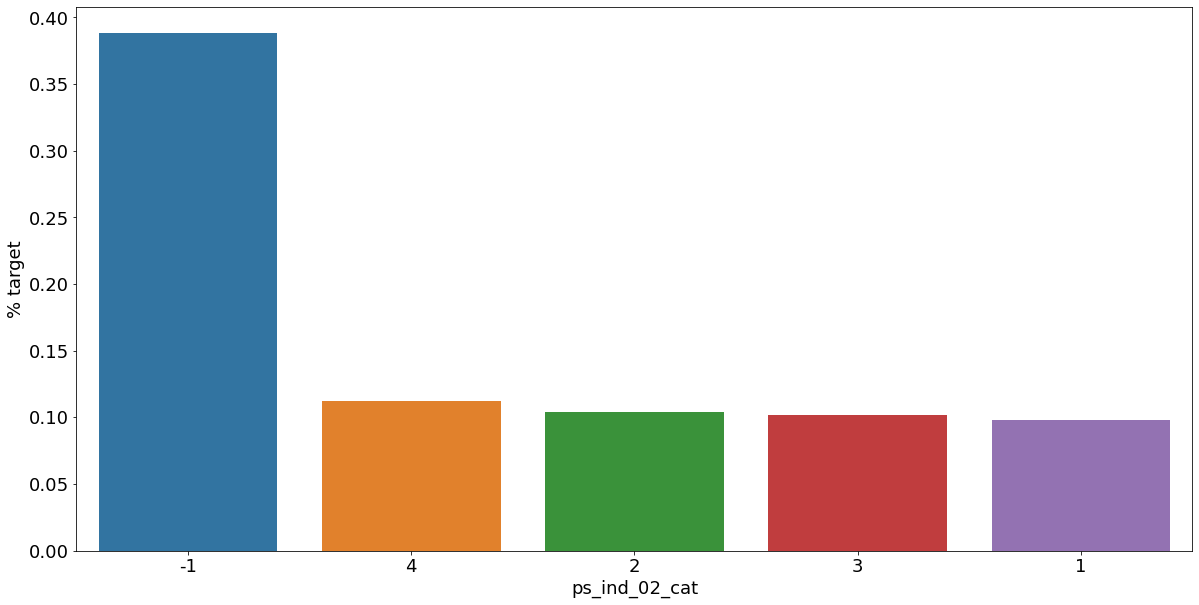

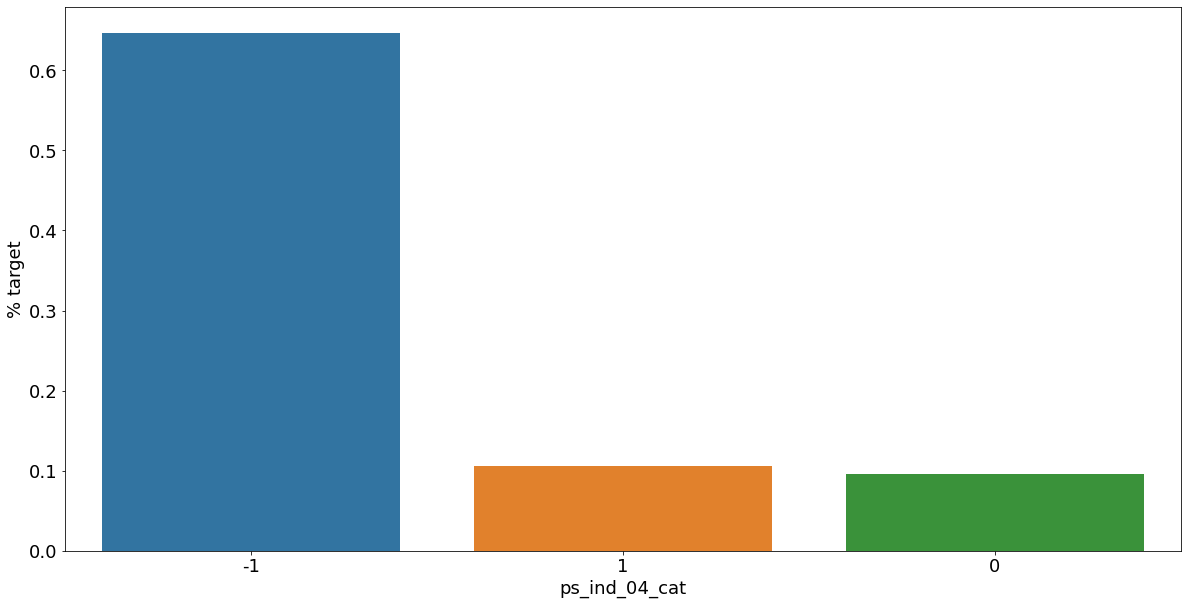

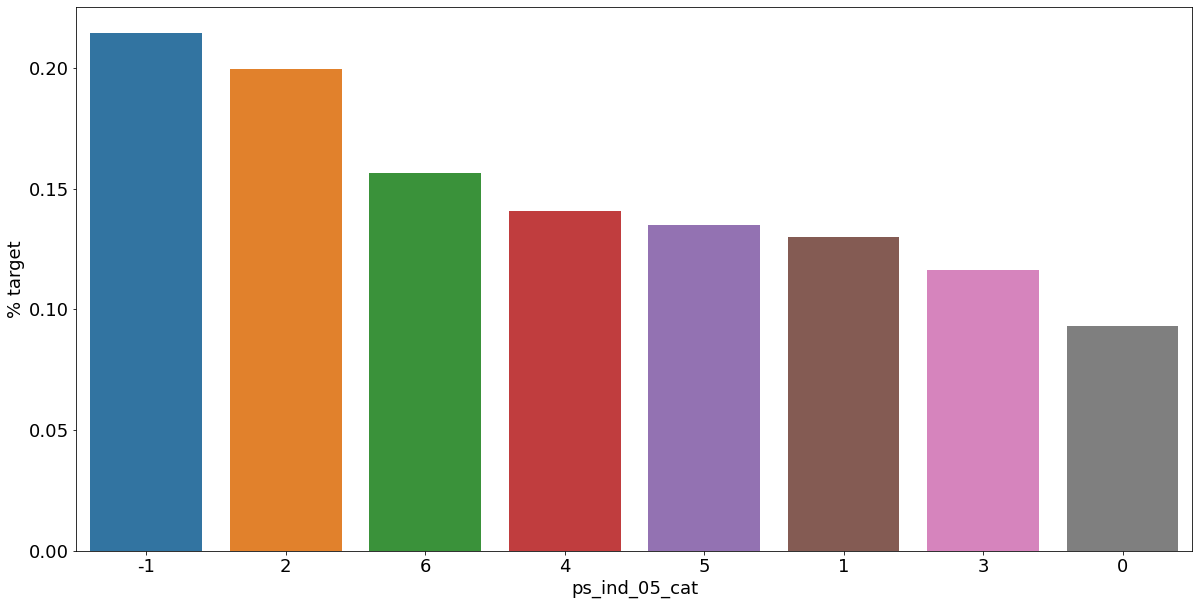

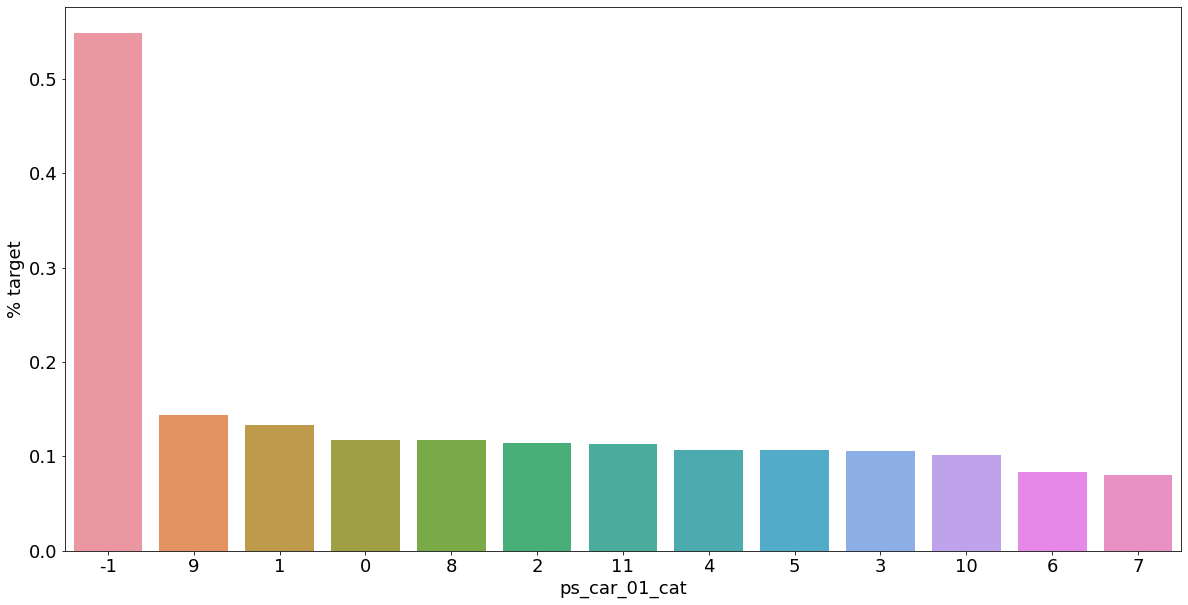

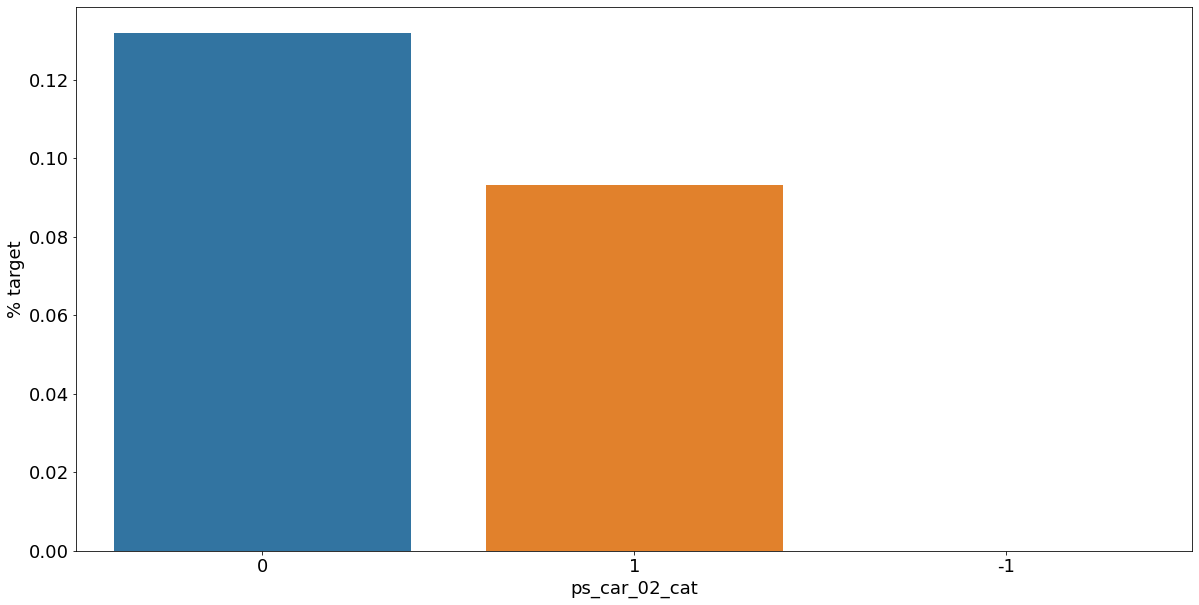

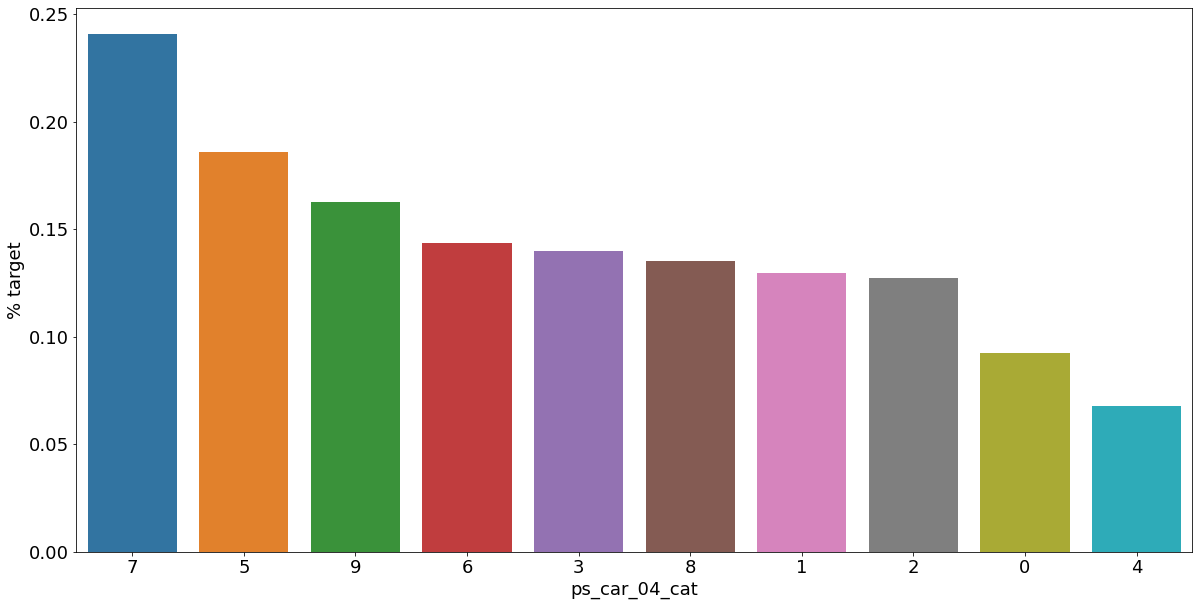

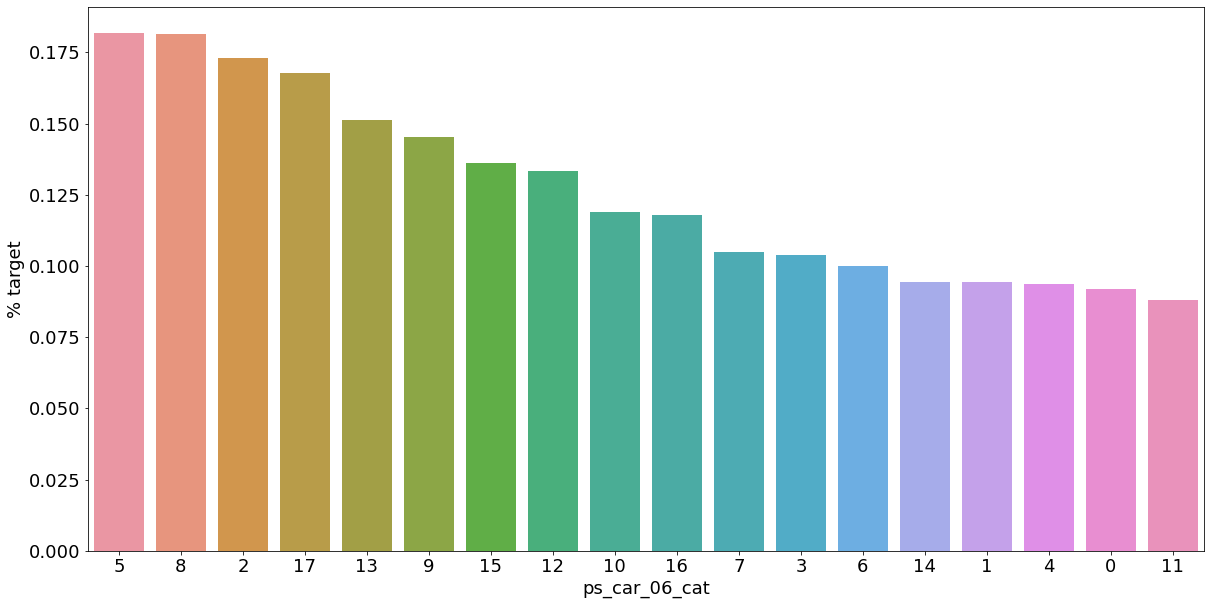

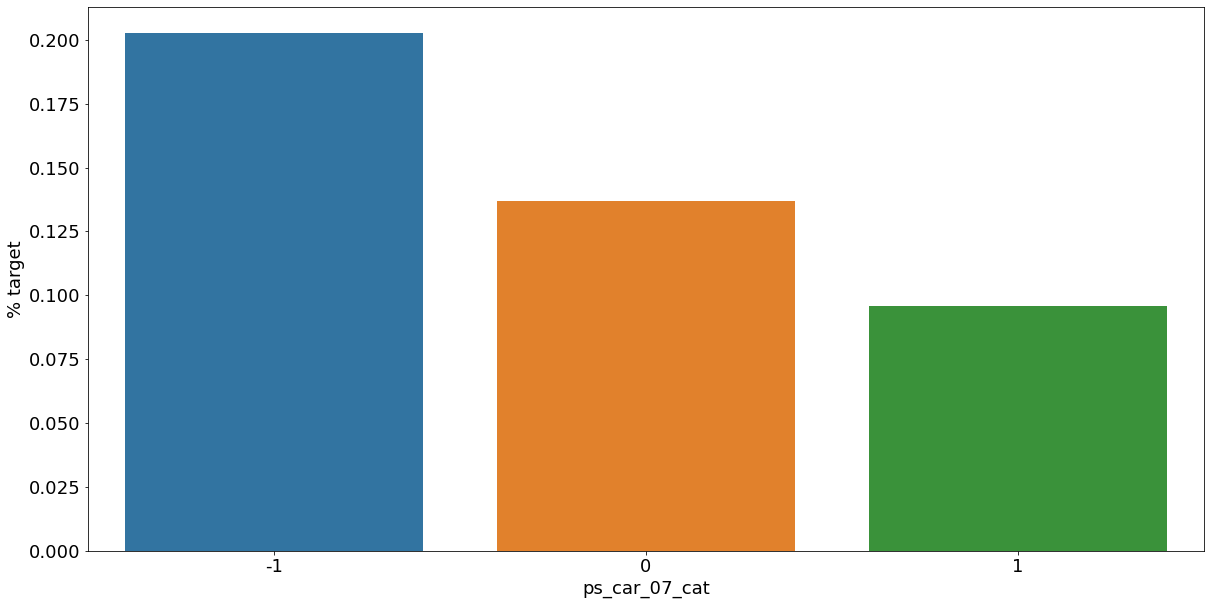

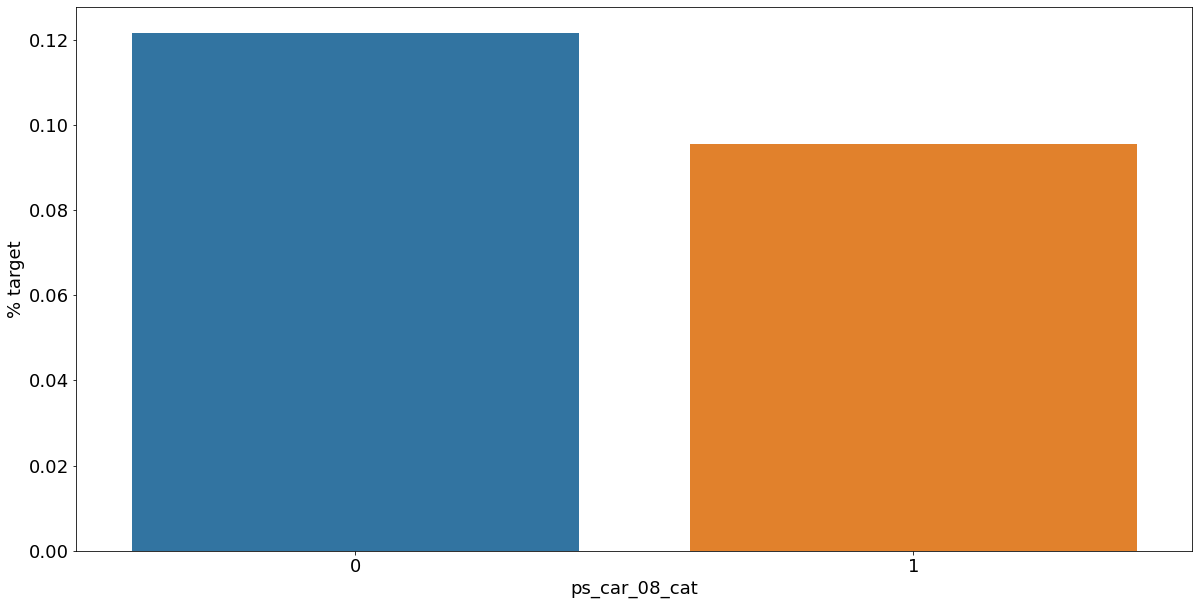

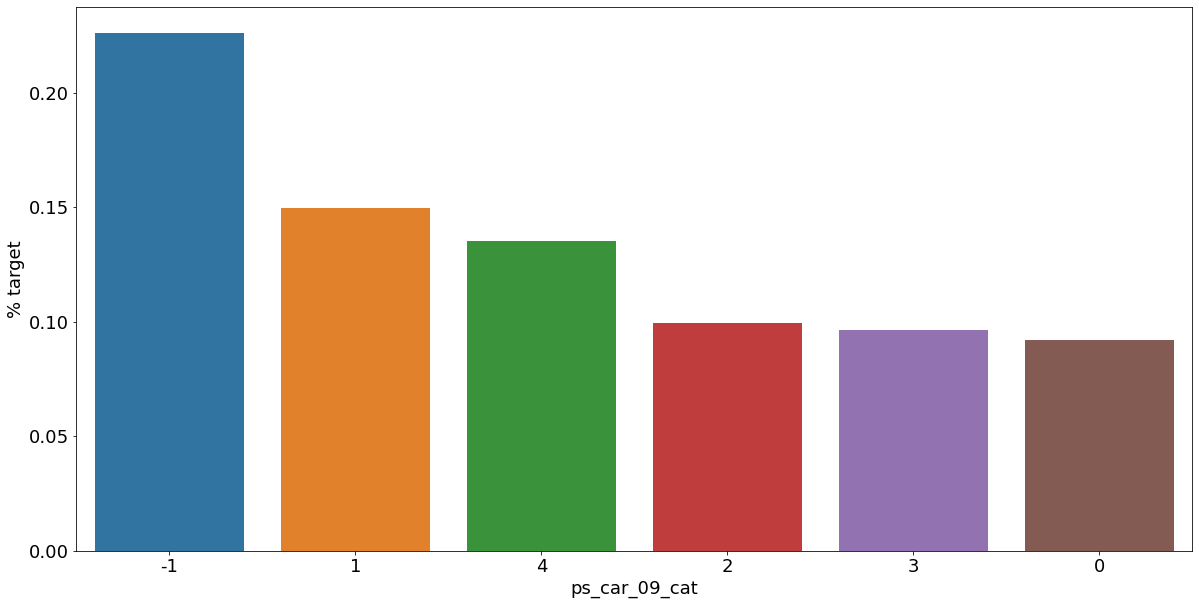

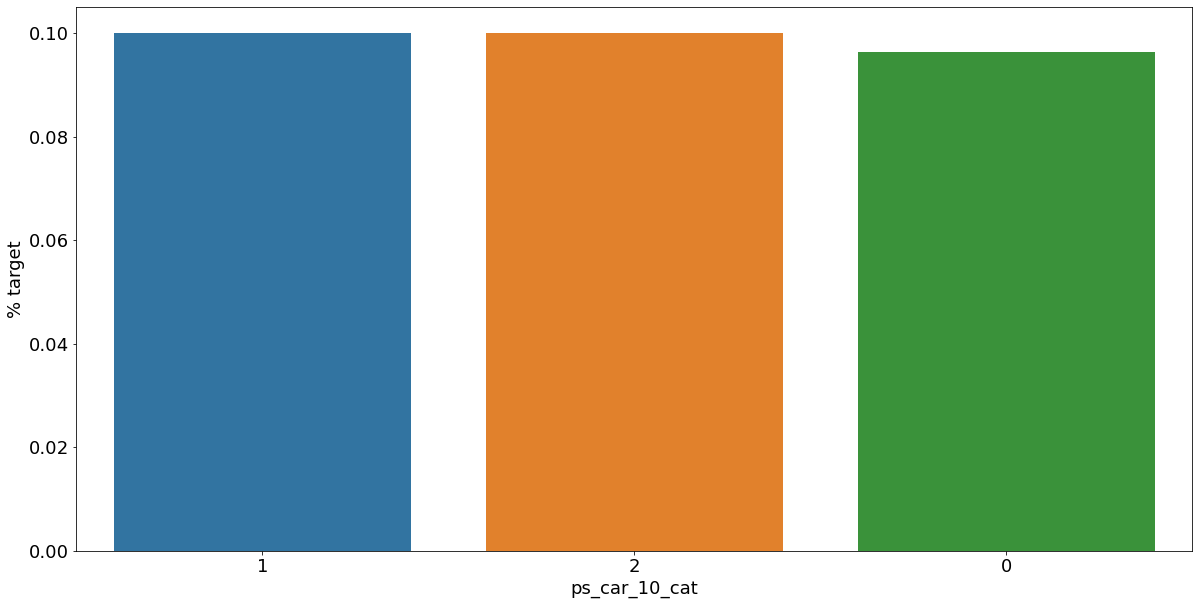

In [31]:
for f in meta[(meta.level == "nominal") & (meta.keep)].index:
    cat_perc = ttrain[[f, "target"]].groupby([f], as_index=False).mean()
    cat_perc.sort_values(by="target", ascending=False, inplace=True)

    plt.figure(figsize=(20, 10))
    sns.barplot(x=f, y="target", data=cat_perc, order=cat_perc[f])

    plt.xlabel(f, fontsize=18)
    plt.ylabel("% target", fontsize=18)
    plt.tick_params(axis="both", which="major", labelsize=18)
    plt.show()

missing value에 값을 채워넣지 않은 변수는 missing value마저 어떤 특정한 값, 상황이라고 주장하듯 보인다.

### Interval variables